# Using the Fal mooring in situ data to calculate air-sea CO$_2$ gas fluxes #

## Introduction
This notebook explains how we can use the Fal mooring data to calculate air-sea CO$_2$ gas fluxes

### Load Relevant Modules
To begin with the required Python packages are loaded.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
# Install basemap-data-hires

### Loading the mooring data
Now we need to load the mooring data which is provided as a tab separated variable file (.tsv). And we can then view the first 5 rows of the dataset using the .head(5) command. Alternatively you can view the last 5 rows of the dataset using .tail(5).

In [2]:
# Load data file
region_data = pd.read_csv('merged_draft_final.tsv', sep='\t', index_col=0)
# Show small proportion of the data
region_data.head(5)

Lon        Lat          Datetime        Date  Year  Month  Day  Hour  \
0 -5.027979  50.216161  14/09/2018 00:00  14/09/2018  2018      9   14     0   
1 -5.027979  50.216161  14/09/2018 00:00  14/09/2018  2018      9   14     0   
2 -5.027979  50.216161  14/09/2018 01:00  14/09/2018  2018      9   14     1   
3 -5.027979  50.216161  14/09/2018 02:00  14/09/2018  2018      9   14     2   
4 -5.027979  50.216161  14/09/2018 03:00  14/09/2018  2018      9   14     3   

   Minute  Second   salinity  sstskin_c   sstskin_k   windu10  \
0       0       0  34.417400  16.709000  289.859000  2.057613   
1       0       0  34.417400  16.709000  289.859000  2.057613   
2       0       0  34.175967  16.681167  289.831167  2.057613   
3       0       0  33.936400  16.606000  289.756000  2.572016   
4       0       0  33.718900  16.542000  289.692000  2.572016   

   windu10_moment2  pco2sw_corr_split  pressure_met  pco2_air_noaa_2018  \
0         4.233772         500.019450        1024.1            401.3573   
1         4.233772         488.055048        1024.1            401.3573   
2         4.233772         550.944840        1023.9            401.3573   
3         6.615269         588.035046        1023.5            401.3573   
4         6.615269         627.313939        1022.9            401.3573   

    pco2_sst  
0  16.642000  
1  16.642000  
2  16.598000  
3  16.514667  
4  16.463000

### Preparing to Plot the Recorded Data
We want to plot a 'time series' of the data that was recorded. One way to show this is to plot 'Days since [first recording]' along the x-axis and the data along the y-axis. The cell below finds the number of days since the first measurement (technically it finds the number of seconds since the first recording and divides this by 86,400) and creates a new column in the Dataframe to show these values.

Note: if your own dataset doesn't have columns for 'Year', 'Month', 'Day', etc. then the below won't work and you need to add this to your dataset. This can be done in Excel (but better to do it Pythonically if possible to prevent Excel making changes to it's own formatting), and see example datasets for the required format.

In [3]:
# Initialise the new Dataframe column and fill with a hold value
region_data['Days_since'] = 'hold value'

# Produce a datetime object for the first recording 
# - the zeros in the line below show it's the first row (index starts at zero)
start_date = dt.datetime(region_data.loc[0,'Year'],region_data.loc[0,'Month'],region_data.loc[0,'Day'],
                            region_data.loc[0,'Hour'],region_data.loc[0,'Minute'],region_data.loc[0,'Second'])

# Loop over all rows in the Dataframe - i.e from 0 to the length of the Dataframe
for i in range(0,len(region_data)):
    # Get the date time object for the currently indexed recording - indexed by i
    future_date = dt.datetime(region_data.loc[i,'Year'],region_data.loc[i,'Month'],region_data.loc[i,'Day'],
                              region_data.loc[i,'Hour'],region_data.loc[i,'Minute'],region_data.loc[i,'Second'])
    
    # Find difference between current datetime and inital datetime
    day_diff = future_date - start_date
    
    # Fill Dataframe column with time difference in seconds (found using .total_seconds()) 
    # divided by 86400 (proportion of days that have passed)
    region_data.loc[i,'Days_since'] = day_diff.total_seconds()/(60*60*24)

We can filter the Dataframe to show just the 'Datetime' and 'Days_since' columns. Showing the head can give an idea if the previous cell worked - although a more thorough check is advised if possible depending on Dataframe size.

In [4]:
# Filter data to 'Datetime' and 'Days_since' columns and show first 5 rows.
region_data[['Datetime', 'Days_since']].head(5)

Datetime Days_since
0  14/09/2018 00:00        0.0
1  14/09/2018 00:00        0.0
2  14/09/2018 01:00   0.041667
3  14/09/2018 02:00   0.083333
4  14/09/2018 03:00      0.125

### Plotting the Time Series  

The Matplotlib .subplots() function is ideal for this and I have used Seaborn to do the actual plotting - these two packages work well together as Seaborn is built on top of Matplotlib, and Seaborn also integrates easily with Pandas Dataframes. 

Producing nice looking plots with lovely axes labels and colors etc. can be fiddly, but you can refer to the documentation (and StackOverflow!) for hints and tips.

In [5]:
import matplotlib.dates as mdates


# Set up a figure with 4 axes on it. Sharex=True means all axes will share the bottom axes (can help with clarity)
fig,ax = plt.subplots(3,2, sharex=True)
# Set figure height and width
fig.set_figheight(15), fig.set_figwidth(15)

### PLOTTING THE DATA ### (- *s indicate a plot keyword below)
# These Seaborn commands state that we want a *lineplot*, where the *data* is coming 
# from our region_data Dataframe, and we chose the *x* & *y* columns that we want, as well
# as the axis (*ax*) we want to plot on (indexed by 0 at the top and 3 at the bottom)
sns.lineplot(data=region_data, x='Date', y='salinity', color='turquoise', ax=ax[0,0])
sns.lineplot(data=region_data, x='Date', y='sstskin_k', color='red', ax=ax[0,1])
sns.lineplot(data=region_data, x='Date', y='windu10', color='green', ax=ax[1,0])
sns.lineplot(data=region_data, x='Date', y='pco2sw_corr_split', color='orange', ax=ax[1,1], hue=region_data["pco2sw_corr_split"].isna().cumsum(), palette=["blue"]*sum(region_data["pco2sw_corr_split"].isna()), legend=False, markers=True)
sns.lineplot(data=region_data, x='Date', y='pressure_met', color='purple', ax=ax[2, 0])
sns.lineplot(data=region_data, x='Date', y='pco2_air_noaa_2018', color='black', ax=ax[2, 1])

# Use WeekdayLocator and DateFormatter to show only weekly dates on x-axis
date_fmt = mdates.DateFormatter('%d-%m-%Y')
week_locator = mdates.WeekdayLocator(byweekday=mdates.MO)
ax[2,0].xaxis.set_major_locator(week_locator)
ax[2,0].xaxis.set_major_formatter(date_fmt)
ax[2,1].xaxis.set_major_locator(week_locator)
ax[2,1].xaxis.set_major_formatter(date_fmt)

# Set x axis label
ax[2,0].set_xlabel('Date', fontsize = 20) 
ax[2,1].set_xlabel('Date', fontsize = 20) 
ax[2,0].set_xticklabels(region_data['Date'], rotation='vertical')
ax[2,1].set_xticklabels(region_data['Date'], rotation='vertical')

# Set x-axis tick labels
tick_locs = ax[2,0].get_xticks() # Get the current tick locations
ax[2,0].set_xticks(tick_locs) # Set the same tick locations
ax[2,0].set_xticklabels(region_data['Date'][::len(region_data['Date'])//len(tick_locs)][:-1], rotation='vertical')
tick_locs = ax[2,1].get_xticks() # Get the current tick locations
ax[2,1].set_xticks(tick_locs) # Set the same tick locations
ax[2,1].set_xticklabels(region_data['Date'][::len(region_data['Date'])//len(tick_locs)][:-1], rotation='vertical')



# Set y label for each axis
ax[0,0].set_ylabel('Salinity', fontsize = 20) 
ax[0,1].set_ylabel('SST (K)', fontsize = 20)
ax[1,0].set_ylabel('Windspeed (m/s)', fontsize = 20)
ax[1,1].set_ylabel('Est.pCO2 (µ atm)', fontsize = 20)
ax[2, 0].set_ylabel('Atm.Pressure (mbar)', fontsize = 20)
ax[2, 1].set_ylabel('Atm.pCO2 (ppm)', fontsize = 20)

# Changes how axis ticks are displayed for last two axes
# - you can comment these out with # to see the effect when removed
ax[0,0].yaxis.set_major_formatter('{x:9<5.2f}')
ax[0,1].yaxis.set_major_formatter('{x:9<5.2f}')
ax[1,0].yaxis.set_major_formatter('{x:9<5.2f}')
ax[1,1].yaxis.set_major_formatter('{x:9<5.2f}')
ax[2,0].yaxis.set_major_formatter('{x:9<5.2f}')
ax[2,1].yaxis.set_major_formatter('{x:9<5.2f}')

# Set a tight layout to remove extra space around the plots
fig.tight_layout()
# Reduce gap between top of figure and the title
fig.subplots_adjust(top=0.95)

# Show figure!
plt.show()

/Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: 
The palette list has fewer values (427) than needed (428) and will cycle, which may produce an uninterpretable plot.
  
/Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator


### Displaying Data on a Map

Now we aim to display the recorded data on a map. There are a couple of Python packages to do this but this script used Basemap (which is part of Matplotlib - although needs to be installed additionally) due to it having a decent spatial resolution. Note: if you're familar with GIS and producing Shapefiles you could attempt to use Geopandas, but it would require additional work.

First we can aquire the min/max longitude and latitude for our data to give us an idea of the region to plot.

In [6]:
# Get min and max of longitude and latitude
region_data.describe().loc[['min','max'],['Lon','Lat']]

Lon        Lat
min -5.027979  50.216161
max -5.027979  50.216161

The fuction below has been written to allow easy plotting of the example datasets but also enable you to plot your own. Run the cell below to initalise the function (i.e nothing will happen)

In [7]:
def get_coords(location):
    if location == 'CarrickRoads':
        lon_min = -5.2
        lon_max = -4.9
        lat_min = 50.1
        lat_max = 50.25
        return lon_min, lon_max, lat_min, lat_max
    
    elif location == 'Agulhas':
        lon_min = 19.7
        lon_max = 20.2
        lat_min = -35.0
        lat_max = -34.7
        return lon_min, lon_max, lat_min, lat_max
    
    else:
        lon_min = input('Enter minimum longitude (most Westerly): ')
        lon_max = input('Enter minimum longitude (most Easterly): ')
        lat_min = input('Enter minimum latitude (most Southerly): ')
        lat_max = input('Enter maximum latitude (most Northerly): ')
        print('\n\n')
        if (lon_min >= lon_max) or (lat_min >= lat_max):
            print('Check if min/max were entered in the correct order (is a min greater than a max?)')
            return np.nan, np.nan, np.nan, np.nan
        
        
        return float(lon_min), float(lon_max), float(lat_min), float(lat_max)

In the cell below you can change the string in the get_coords() function. Changing it to 'Carrick Roads' or 'Agulhus' will assign the min/max latitude & longtudes to those needed for plotting these regions (you can also enter 'World' but it's there purely to play with map projections if you wish). Alternatively you can enter 'Other', in which case text boxes will appear for you to enter the min/max longitudes and latitudes for your data.

In [8]:
### Change string to 'CarrickRoads', 'Agulhas' or your own region name (use '_' for spaces)
region_name = 'CarrickRoads'
# Performs function
lon_min, lon_max, lat_min, lat_max = get_coords(region_name)

# Note: if you're having problems with the input fields you can uncomment the line below 
# and  just enter the values instead, but also comment out the line above to avoid confusion.

# lon_min, lon_max, lat_min, lat_max = __ , __ , __ , __

# Print out current values
print('Current values:')
print(f'Longitude -> \t min:{lon_min} \t max:{lon_max}')
print(f'Latitude -> \t min:{lat_min} \t max:{lat_max}')

Current values:
Longitude -> 	 min:-5.2 	 max:-4.9
Latitude -> 	 min:50.1 	 max:50.25


Now we have the longitude and latitude bounds we can plot the map. The code below essentially 1) initialises the figure, 2) defines our map, 3) adds details to the plot, 4) adds the gridlines, and 5) plots the track from the data.

The current resolution is set to 'f' (full) to get a high resolution image. If you haven't installed the basemap-data-hires package this won't work and you must change this the resolution to 'i' (intermediate) which is coarser.

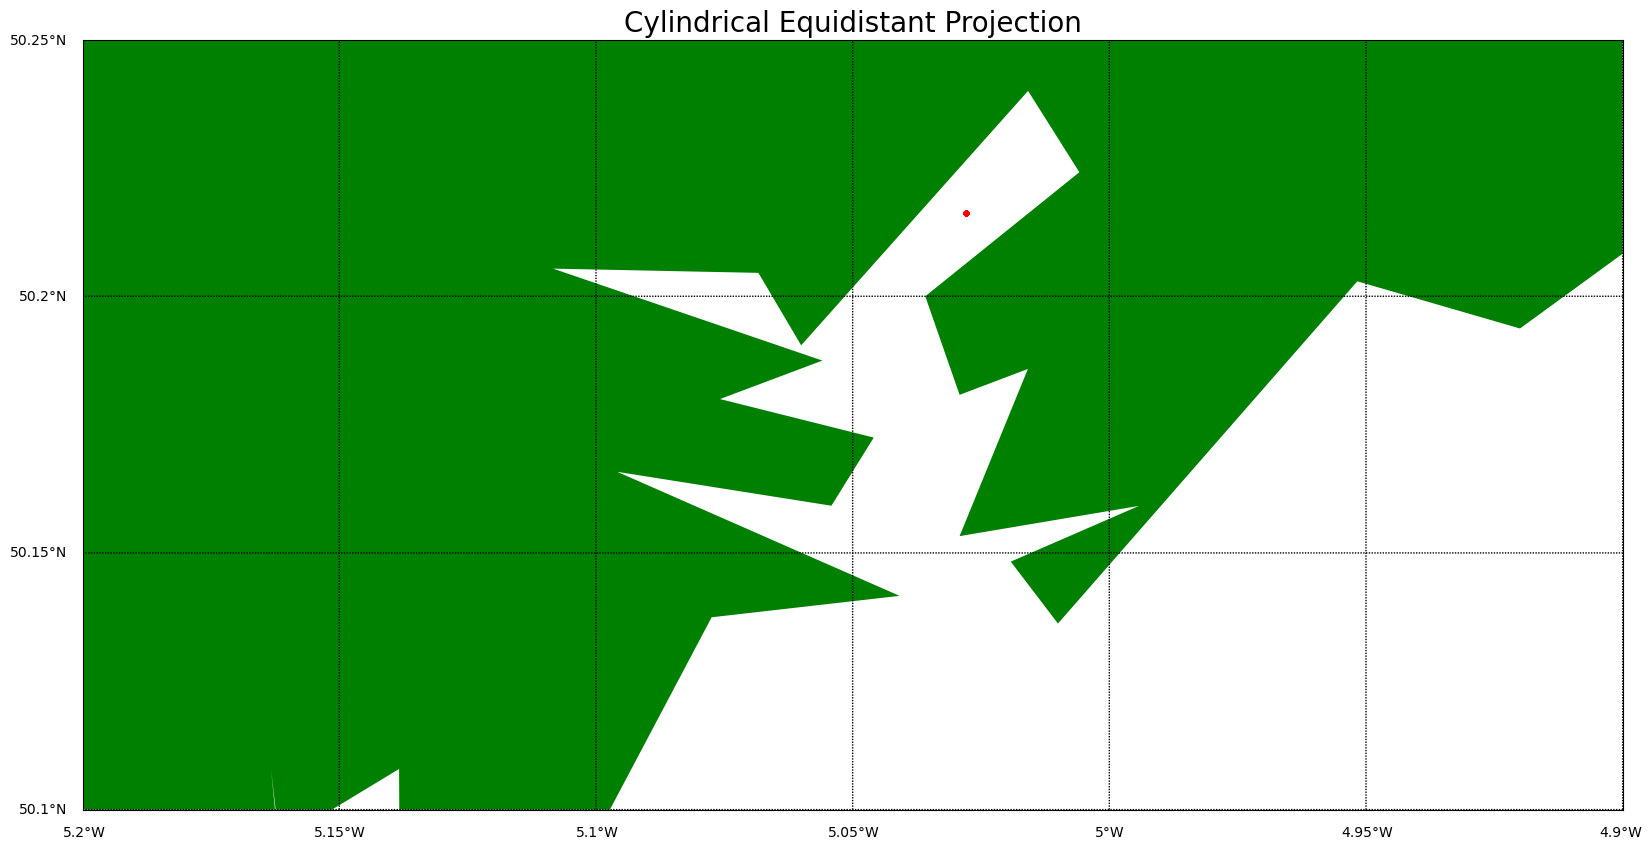

In [9]:
# 1) Intialise figure and figure size
fig = plt.gcf()
fig.set_size_inches(20,10, forward=True)

# 2) Define the map 
# Here we have a cylindrical equidistant projection bound by our chosen latitude and longitudes,
# and a chosen resolution ('i' = intermediate)
m = Basemap(projection='cyl',
            llcrnrlat=lat_min,urcrnrlat=lat_max,
            llcrnrlon=lon_min,urcrnrlon=lon_max,
            resolution='i')

# 3) Fill land masses with green colour
m.fillcontinents(color='green')
# Add title to plot - change as you wish
plt.title("Cylindrical Equidistant Projection", fontsize=20)

# 4) Draw map gridlines - the 'split_lat' and 'split_lon' have been set to show a 0.05x0.05 degree 
# grid, which reflects that given in the ESA CCI data (covered next)
split_lon = round((lon_max - lon_min)/0.05) + 1
lons = np.linspace(lon_min,lon_max,split_lon)
m.drawmeridians(lons,labels=[1,0,0,1])

split_lat = round((lat_max - lat_min)/0.05) + 1
lats = np.linspace(lat_min,lat_max,split_lat)
m.drawparallels(lats,labels=[1,0,0,1])


track_lon, track_lat = m(np.asarray(region_data['Lon']),np.asarray(region_data['Lat']))
plt.scatter(track_lon,track_lat, s=10, marker='o', color='Red') 


plt.show()

### Using FluxEngine
To calcualte the air-sea gas fluxes we are going to be using a bulk formulation of the calculation and using the FluxEngine python module toolbox. So lets check to see which version of the FluxEngine we have installed. It should be at least version 4.0.

In [10]:
# We primarily use FluxEngine from the command line, but here we can import it just to check the version
import fluxengine as fe
import fluxengine.tools.lib_text2ncdf as nc
print(fe.__version__)

4.0


Now we need to convert our .tsv data file in the filetype that the FluxEngine uses which is NetCDF. NetCDF is a standard file format used by many scientific and engineering communities and it allows the data to be compressed and the file can contain the metadata that describes how the data were collected, created and processed.

In [11]:
# Converting to netCDF
nc.convert_text_to_netcdf(['merged_draft_final.tsv'],startTime='2018-09-14 00:00:00',endTime='2018-11-30 08:00:00',ncOutPath='merged-drft-ppr.nc',temporalResolution='01 00:00',
    colNames=['salinity', 'sstskin_c', 'sstskin_k', 'windu10', 'windu10_moment2', 'pco2sw_corr_split', 'pressure_met', 'pco2_air_noaa_2018', 'pco2_sst'],
    latProd='Lat',lonProd='Lon',dateIndex=3,parseUnits=False,temporalChunking=1857,limits=[50,51,-6,-5],dateFormatDayFirst=True)

Calculating dimensions.
The following columns will be extracted:
	 salinity
	 sstskin_c
	 sstskin_k
	 windu10
	 windu10_moment2
	 pco2sw_corr_split
	 pressure_met
	 pco2_air_noaa_2018
	 pco2_sst
Processing data in file merged_draft_final.tsv


/Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/fluxengine/tools/lib_text2ncdf.py:98: RuntimeWarning: Mean of empty slice
  output[coords] = np.nanmean(vals);


Writing output netCDF file(s)...
Finished converting text file to netCDF3. There were 0 values which fell outside the specified lat/lon or start/stop time boundaries.
Number of missing values found: 0


We now have our NetCDF (version 3) file and we can now use the FluxEngine to calculate the air-sea gas fluxes.

In [12]:
# Running FluxEngine
!fe_run.py "draft_new.conf" -s "2018-09-14" -e "2018-11-30" -l 

Executing on 'Sayoojs-MacBook-Air-98.local' at 06/03/2023 12:45:23
Parsing settings file at: /Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/fluxengine/core/settings.xml
(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (1, 1)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the saline skin model (0.100000 psu added to skin salinities)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SST gradient handling is on, using SSTskin and SSTfnd = SSTskin + 0.170000 for flux calculation (ignoring SSTfnd data in configuration file).
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the RAPID model (from Woolf et al., 2016)
(rate_parameterisation.py: k_Nightingale2000.__call__) Using the Nightingale et al., 2000 (N00) k parameterisation
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SUCCESS writing file /Users/sayooj/Downloads/FE_FalEstuary_output_Autumn2018gf.nc
Flux engine exited with exit code: 0
14 Sep 2018 00:00:00 complete

(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the saline skin model (0.100000 psu added to skin salinities)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SST gradient handling is on, using SSTskin and SSTfnd = SSTskin + 0.170000 for flux calculation (ignoring SSTfnd data in configuration file).
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the RAPID model (from Woolf et al., 2016)
(rate_parameterisation.py: k_Nightingale2000.__call__) Using the Nightingale et al., 2000 (N00) k parameterisation
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SUCCESS writing file /Users/sayooj/Downloads/FE_FalEstuary_output_Autumn2018gf.nc
Flux engine exited with exit code: 0
23 Sep 2018 00:00:00 completed successfully.

Parsing settings file at: /Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/fluxengine/core/settings.xml
(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (1, 1)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) 

(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the saline skin model (0.100000 psu added to skin salinities)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SST gradient handling is on, using SSTskin and SSTfnd = SSTskin + 0.170000 for flux calculation (ignoring SSTfnd data in configuration file).
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the RAPID model (from Woolf et al., 2016)
(rate_parameterisation.py: k_Nightingale2000.__call__) Using the Nightingale et al., 2000 (N00) k parameterisation
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SUCCESS writing file /Users/sayooj/Downloads/FE_FalEstuary_output_Autumn2018gf.nc
Flux engine exited with exit code: 0
02 Oct 2018 00:00:00 completed successfully.

Parsing settings file at: /Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/fluxengine/core/settings.xml
(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (1, 1)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) 

(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the saline skin model (0.100000 psu added to skin salinities)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SST gradient handling is on, using SSTskin and SSTfnd = SSTskin + 0.170000 for flux calculation (ignoring SSTfnd data in configuration file).
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the RAPID model (from Woolf et al., 2016)
(rate_parameterisation.py: k_Nightingale2000.__call__) Using the Nightingale et al., 2000 (N00) k parameterisation
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SUCCESS writing file /Users/sayooj/Downloads/FE_FalEstuary_output_Autumn2018gf.nc
Flux engine exited with exit code: 0
11 Oct 2018 00:00:00 completed successfully.

Parsing settings file at: /Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/fluxengine/core/settings.xml
(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (1, 1)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) 

(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the saline skin model (0.100000 psu added to skin salinities)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SST gradient handling is on, using SSTskin and SSTfnd = SSTskin + 0.170000 for flux calculation (ignoring SSTfnd data in configuration file).
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the RAPID model (from Woolf et al., 2016)
(rate_parameterisation.py: k_Nightingale2000.__call__) Using the Nightingale et al., 2000 (N00) k parameterisation
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SUCCESS writing file /Users/sayooj/Downloads/FE_FalEstuary_output_Autumn2018gf.nc
Flux engine exited with exit code: 0
20 Oct 2018 00:00:00 completed successfully.

Parsing settings file at: /Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/fluxengine/core/settings.xml
(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (1, 1)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) 

(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the saline skin model (0.100000 psu added to skin salinities)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SST gradient handling is on, using SSTskin and SSTfnd = SSTskin + 0.170000 for flux calculation (ignoring SSTfnd data in configuration file).
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the RAPID model (from Woolf et al., 2016)
(rate_parameterisation.py: k_Nightingale2000.__call__) Using the Nightingale et al., 2000 (N00) k parameterisation
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SUCCESS writing file /Users/sayooj/Downloads/FE_FalEstuary_output_Autumn2018gf.nc
Flux engine exited with exit code: 0
29 Oct 2018 00:00:00 completed successfully.

Parsing settings file at: /Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/fluxengine/core/settings.xml
(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (1, 1)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) 

(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the saline skin model (0.100000 psu added to skin salinities)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SST gradient handling is on, using SSTskin and SSTfnd = SSTskin + 0.170000 for flux calculation (ignoring SSTfnd data in configuration file).
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the RAPID model (from Woolf et al., 2016)
(rate_parameterisation.py: k_Nightingale2000.__call__) Using the Nightingale et al., 2000 (N00) k parameterisation
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SUCCESS writing file /Users/sayooj/Downloads/FE_FalEstuary_output_Autumn2018gf.nc
Flux engine exited with exit code: 0
07 Nov 2018 00:00:00 completed successfully.

Parsing settings file at: /Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/fluxengine/core/settings.xml
(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (1, 1)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) 

(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the saline skin model (0.100000 psu added to skin salinities)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SST gradient handling is on, using SSTskin and SSTfnd = SSTskin + 0.170000 for flux calculation (ignoring SSTfnd data in configuration file).
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the RAPID model (from Woolf et al., 2016)
(rate_parameterisation.py: k_Nightingale2000.__call__) Using the Nightingale et al., 2000 (N00) k parameterisation
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SUCCESS writing file /Users/sayooj/Downloads/FE_FalEstuary_output_Autumn2018gf.nc
Flux engine exited with exit code: 0
16 Nov 2018 00:00:00 completed successfully.

Parsing settings file at: /Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/fluxengine/core/settings.xml
(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (1, 1)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) 

(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the saline skin model (0.100000 psu added to skin salinities)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SST gradient handling is on, using SSTskin and SSTfnd = SSTskin + 0.170000 for flux calculation (ignoring SSTfnd data in configuration file).
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the RAPID model (from Woolf et al., 2016)
(rate_parameterisation.py: k_Nightingale2000.__call__) Using the Nightingale et al., 2000 (N00) k parameterisation
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SUCCESS writing file /Users/sayooj/Downloads/FE_FalEstuary_output_Autumn2018gf.nc
Flux engine exited with exit code: 0
25 Nov 2018 00:00:00 completed successfully.

Parsing settings file at: /Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/fluxengine/core/settings.xml
(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (1, 1)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) 

The 'completed successfully' message means that we now have the air-sea gas fluxes calculated from the Fal mooring data. The output is currently in a NetCDF file. You can view this using Panoply which is data viewer developed and provided for free by NASA. Alternatively we can extract the data from the NetCDF file and store it back into our original .tsv file as additional columns of data.

In [13]:
# Appending FluxEngine results
!fe_append2insitu.py "/Users/sayooj/FE_FalEstuary_output_Autumn2018gf.nc" "merged_draft_final.tsv" "draft_estuary.tsv" --varsToAppend "OF" "OK3" "OSFC" "OIC1" --dateIndex 3 --lonCol "Lon" --latCol "Lat" 


Combining files at  /Users/sayooj/FE_FalEstuary_output_Autumn2018gf.nc and merged_draft_final.tsv
Row 409 Warning: No data found for timestep -247 lat 50.216161 lon -5.027979. nan inserted instead
Row 409 Warning: No data found for timestep -247 lat 50.216161 lon -5.027979. nan inserted instead
Row 409 Warning: No data found for timestep -247 lat 50.216161 lon -5.027979. nan inserted instead
Row 409 Warning: No data found for timestep -247 lat 50.216161 lon -5.027979. nan inserted instead
Row 410 Warning: No data found for timestep -247 lat 50.216161 lon -5.027979. nan inserted instead
Row 410 Warning: No data found for timestep -247 lat 50.216161 lon -5.027979. nan inserted instead
Row 410 Warning: No data found for timestep -247 lat 50.216161 lon -5.027979. nan inserted instead
Row 410 Warning: No data found for timestep -247 lat 50.216161 lon -5.027979. nan inserted instead
Row 411 Warning: No data found for timestep -247 lat 50.216161 lon -5.027979. nan inserted instead
Row 411 War

Row 438 Warning: No data found for timestep -216 lat 50.216161 lon -5.027979. nan inserted instead
Row 438 Warning: No data found for timestep -216 lat 50.216161 lon -5.027979. nan inserted instead
Row 438 Warning: No data found for timestep -216 lat 50.216161 lon -5.027979. nan inserted instead
Row 438 Warning: No data found for timestep -216 lat 50.216161 lon -5.027979. nan inserted instead
Row 439 Warning: No data found for timestep -216 lat 50.216161 lon -5.027979. nan inserted instead
Row 439 Warning: No data found for timestep -216 lat 50.216161 lon -5.027979. nan inserted instead
Row 439 Warning: No data found for timestep -216 lat 50.216161 lon -5.027979. nan inserted instead
Row 439 Warning: No data found for timestep -216 lat 50.216161 lon -5.027979. nan inserted instead
Row 440 Warning: No data found for timestep -216 lat 50.216161 lon -5.027979. nan inserted instead
Row 440 Warning: No data found for timestep -216 lat 50.216161 lon -5.027979. nan inserted instead
Row 440 Wa

Row 467 Warning: No data found for timestep -188 lat 50.216161 lon -5.027979. nan inserted instead
Row 467 Warning: No data found for timestep -188 lat 50.216161 lon -5.027979. nan inserted instead
Row 468 Warning: No data found for timestep -188 lat 50.216161 lon -5.027979. nan inserted instead
Row 468 Warning: No data found for timestep -188 lat 50.216161 lon -5.027979. nan inserted instead
Row 468 Warning: No data found for timestep -188 lat 50.216161 lon -5.027979. nan inserted instead
Row 468 Warning: No data found for timestep -188 lat 50.216161 lon -5.027979. nan inserted instead
Row 469 Warning: No data found for timestep -188 lat 50.216161 lon -5.027979. nan inserted instead
Row 469 Warning: No data found for timestep -188 lat 50.216161 lon -5.027979. nan inserted instead
Row 469 Warning: No data found for timestep -188 lat 50.216161 lon -5.027979. nan inserted instead
Row 469 Warning: No data found for timestep -188 lat 50.216161 lon -5.027979. nan inserted instead
Row 470 Wa

Row 498 Warning: No data found for timestep -157 lat 50.216161 lon -5.027979. nan inserted instead
Row 499 Warning: No data found for timestep -157 lat 50.216161 lon -5.027979. nan inserted instead
Row 499 Warning: No data found for timestep -157 lat 50.216161 lon -5.027979. nan inserted instead
Row 499 Warning: No data found for timestep -157 lat 50.216161 lon -5.027979. nan inserted instead
Row 499 Warning: No data found for timestep -157 lat 50.216161 lon -5.027979. nan inserted instead
Row 500 Warning: No data found for timestep -157 lat 50.216161 lon -5.027979. nan inserted instead
Row 500 Warning: No data found for timestep -157 lat 50.216161 lon -5.027979. nan inserted instead
Row 500 Warning: No data found for timestep -157 lat 50.216161 lon -5.027979. nan inserted instead
Row 500 Warning: No data found for timestep -157 lat 50.216161 lon -5.027979. nan inserted instead
Row 501 Warning: No data found for timestep -157 lat 50.216161 lon -5.027979. nan inserted instead
Row 501 Wa

Row 530 Warning: No data found for timestep -96 lat 50.216161 lon -5.027979. nan inserted instead
Row 531 Warning: No data found for timestep -96 lat 50.216161 lon -5.027979. nan inserted instead
Row 531 Warning: No data found for timestep -96 lat 50.216161 lon -5.027979. nan inserted instead
Row 531 Warning: No data found for timestep -96 lat 50.216161 lon -5.027979. nan inserted instead
Row 531 Warning: No data found for timestep -96 lat 50.216161 lon -5.027979. nan inserted instead
Row 532 Warning: No data found for timestep -96 lat 50.216161 lon -5.027979. nan inserted instead
Row 532 Warning: No data found for timestep -96 lat 50.216161 lon -5.027979. nan inserted instead
Row 532 Warning: No data found for timestep -96 lat 50.216161 lon -5.027979. nan inserted instead
Row 532 Warning: No data found for timestep -96 lat 50.216161 lon -5.027979. nan inserted instead
Row 533 Warning: No data found for timestep -96 lat 50.216161 lon -5.027979. nan inserted instead
Row 533 Warning: No 

Row 562 Warning: No data found for timestep -66 lat 50.216161 lon -5.027979. nan inserted instead
Row 563 Warning: No data found for timestep -66 lat 50.216161 lon -5.027979. nan inserted instead
Row 563 Warning: No data found for timestep -66 lat 50.216161 lon -5.027979. nan inserted instead
Row 563 Warning: No data found for timestep -66 lat 50.216161 lon -5.027979. nan inserted instead
Row 563 Warning: No data found for timestep -66 lat 50.216161 lon -5.027979. nan inserted instead
Row 564 Warning: No data found for timestep -66 lat 50.216161 lon -5.027979. nan inserted instead
Row 564 Warning: No data found for timestep -66 lat 50.216161 lon -5.027979. nan inserted instead
Row 564 Warning: No data found for timestep -66 lat 50.216161 lon -5.027979. nan inserted instead
Row 564 Warning: No data found for timestep -66 lat 50.216161 lon -5.027979. nan inserted instead
Row 565 Warning: No data found for timestep -66 lat 50.216161 lon -5.027979. nan inserted instead
Row 565 Warning: No 

Row 593 Warning: No data found for timestep -35 lat 50.216161 lon -5.027979. nan inserted instead
Row 593 Warning: No data found for timestep -35 lat 50.216161 lon -5.027979. nan inserted instead
Row 593 Warning: No data found for timestep -35 lat 50.216161 lon -5.027979. nan inserted instead
Row 594 Warning: No data found for timestep -35 lat 50.216161 lon -5.027979. nan inserted instead
Row 594 Warning: No data found for timestep -35 lat 50.216161 lon -5.027979. nan inserted instead
Row 594 Warning: No data found for timestep -35 lat 50.216161 lon -5.027979. nan inserted instead
Row 594 Warning: No data found for timestep -35 lat 50.216161 lon -5.027979. nan inserted instead
Row 595 Warning: No data found for timestep -35 lat 50.216161 lon -5.027979. nan inserted instead
Row 595 Warning: No data found for timestep -35 lat 50.216161 lon -5.027979. nan inserted instead
Row 595 Warning: No data found for timestep -35 lat 50.216161 lon -5.027979. nan inserted instead
Row 595 Warning: No 

Row 673 Warning: No data found for timestep 87 lat 50.216161 lon -5.027979. nan inserted instead
Row 673 Warning: No data found for timestep 87 lat 50.216161 lon -5.027979. nan inserted instead
Row 673 Warning: No data found for timestep 87 lat 50.216161 lon -5.027979. nan inserted instead
Row 673 Warning: No data found for timestep 87 lat 50.216161 lon -5.027979. nan inserted instead
Row 674 Warning: No data found for timestep 87 lat 50.216161 lon -5.027979. nan inserted instead
Row 674 Warning: No data found for timestep 87 lat 50.216161 lon -5.027979. nan inserted instead
Row 674 Warning: No data found for timestep 87 lat 50.216161 lon -5.027979. nan inserted instead
Row 674 Warning: No data found for timestep 87 lat 50.216161 lon -5.027979. nan inserted instead
Row 675 Warning: No data found for timestep 87 lat 50.216161 lon -5.027979. nan inserted instead
Row 675 Warning: No data found for timestep 87 lat 50.216161 lon -5.027979. nan inserted instead
Row 675 Warning: No data found

Row 1153 Warning: No data found for timestep -246 lat 50.216161 lon -5.027979. nan inserted instead
Row 1153 Warning: No data found for timestep -246 lat 50.216161 lon -5.027979. nan inserted instead
Row 1153 Warning: No data found for timestep -246 lat 50.216161 lon -5.027979. nan inserted instead
Row 1153 Warning: No data found for timestep -246 lat 50.216161 lon -5.027979. nan inserted instead
Row 1154 Warning: No data found for timestep -246 lat 50.216161 lon -5.027979. nan inserted instead
Row 1154 Warning: No data found for timestep -246 lat 50.216161 lon -5.027979. nan inserted instead
Row 1154 Warning: No data found for timestep -246 lat 50.216161 lon -5.027979. nan inserted instead
Row 1154 Warning: No data found for timestep -246 lat 50.216161 lon -5.027979. nan inserted instead
Row 1155 Warning: No data found for timestep -246 lat 50.216161 lon -5.027979. nan inserted instead
Row 1155 Warning: No data found for timestep -246 lat 50.216161 lon -5.027979. nan inserted instead


Row 1192 Warning: No data found for timestep -215 lat 50.216161 lon -5.027979. nan inserted instead
Row 1192 Warning: No data found for timestep -215 lat 50.216161 lon -5.027979. nan inserted instead
Row 1193 Warning: No data found for timestep -215 lat 50.216161 lon -5.027979. nan inserted instead
Row 1193 Warning: No data found for timestep -215 lat 50.216161 lon -5.027979. nan inserted instead
Row 1193 Warning: No data found for timestep -215 lat 50.216161 lon -5.027979. nan inserted instead
Row 1193 Warning: No data found for timestep -215 lat 50.216161 lon -5.027979. nan inserted instead
Row 1194 Warning: No data found for timestep -215 lat 50.216161 lon -5.027979. nan inserted instead
Row 1194 Warning: No data found for timestep -215 lat 50.216161 lon -5.027979. nan inserted instead
Row 1194 Warning: No data found for timestep -215 lat 50.216161 lon -5.027979. nan inserted instead
Row 1194 Warning: No data found for timestep -215 lat 50.216161 lon -5.027979. nan inserted instead


Row 1224 Warning: No data found for timestep -187 lat 50.216161 lon -5.027979. nan inserted instead
Row 1224 Warning: No data found for timestep -187 lat 50.216161 lon -5.027979. nan inserted instead
Row 1224 Warning: No data found for timestep -187 lat 50.216161 lon -5.027979. nan inserted instead
Row 1225 Warning: No data found for timestep -156 lat 50.216161 lon -5.027979. nan inserted instead
Row 1225 Warning: No data found for timestep -156 lat 50.216161 lon -5.027979. nan inserted instead
Row 1225 Warning: No data found for timestep -156 lat 50.216161 lon -5.027979. nan inserted instead
Row 1225 Warning: No data found for timestep -156 lat 50.216161 lon -5.027979. nan inserted instead
Row 1226 Warning: No data found for timestep -156 lat 50.216161 lon -5.027979. nan inserted instead
Row 1226 Warning: No data found for timestep -156 lat 50.216161 lon -5.027979. nan inserted instead
Row 1226 Warning: No data found for timestep -156 lat 50.216161 lon -5.027979. nan inserted instead


Row 1256 Warning: No data found for timestep -126 lat 50.216161 lon -5.027979. nan inserted instead
Row 1256 Warning: No data found for timestep -126 lat 50.216161 lon -5.027979. nan inserted instead
Row 1257 Warning: No data found for timestep -126 lat 50.216161 lon -5.027979. nan inserted instead
Row 1257 Warning: No data found for timestep -126 lat 50.216161 lon -5.027979. nan inserted instead
Row 1257 Warning: No data found for timestep -126 lat 50.216161 lon -5.027979. nan inserted instead
Row 1257 Warning: No data found for timestep -126 lat 50.216161 lon -5.027979. nan inserted instead
Row 1258 Warning: No data found for timestep -126 lat 50.216161 lon -5.027979. nan inserted instead
Row 1258 Warning: No data found for timestep -126 lat 50.216161 lon -5.027979. nan inserted instead
Row 1258 Warning: No data found for timestep -126 lat 50.216161 lon -5.027979. nan inserted instead
Row 1258 Warning: No data found for timestep -126 lat 50.216161 lon -5.027979. nan inserted instead


Row 1288 Warning: No data found for timestep -95 lat 50.216161 lon -5.027979. nan inserted instead
Row 1289 Warning: No data found for timestep -95 lat 50.216161 lon -5.027979. nan inserted instead
Row 1289 Warning: No data found for timestep -95 lat 50.216161 lon -5.027979. nan inserted instead
Row 1289 Warning: No data found for timestep -95 lat 50.216161 lon -5.027979. nan inserted instead
Row 1289 Warning: No data found for timestep -95 lat 50.216161 lon -5.027979. nan inserted instead
Row 1290 Warning: No data found for timestep -95 lat 50.216161 lon -5.027979. nan inserted instead
Row 1290 Warning: No data found for timestep -95 lat 50.216161 lon -5.027979. nan inserted instead
Row 1290 Warning: No data found for timestep -95 lat 50.216161 lon -5.027979. nan inserted instead
Row 1290 Warning: No data found for timestep -95 lat 50.216161 lon -5.027979. nan inserted instead
Row 1291 Warning: No data found for timestep -95 lat 50.216161 lon -5.027979. nan inserted instead
Row 1291 W

Row 1321 Warning: No data found for timestep -34 lat 50.216161 lon -5.027979. nan inserted instead
Row 1321 Warning: No data found for timestep -34 lat 50.216161 lon -5.027979. nan inserted instead
Row 1321 Warning: No data found for timestep -34 lat 50.216161 lon -5.027979. nan inserted instead
Row 1321 Warning: No data found for timestep -34 lat 50.216161 lon -5.027979. nan inserted instead
Row 1322 Warning: No data found for timestep -34 lat 50.216161 lon -5.027979. nan inserted instead
Row 1322 Warning: No data found for timestep -34 lat 50.216161 lon -5.027979. nan inserted instead
Row 1322 Warning: No data found for timestep -34 lat 50.216161 lon -5.027979. nan inserted instead
Row 1322 Warning: No data found for timestep -34 lat 50.216161 lon -5.027979. nan inserted instead
Row 1323 Warning: No data found for timestep -34 lat 50.216161 lon -5.027979. nan inserted instead
Row 1323 Warning: No data found for timestep -34 lat 50.216161 lon -5.027979. nan inserted instead
Row 1323 W

Row 1353 Warning: No data found for timestep -3 lat 50.216161 lon -5.027979. nan inserted instead
Row 1353 Warning: No data found for timestep -3 lat 50.216161 lon -5.027979. nan inserted instead
Row 1353 Warning: No data found for timestep -3 lat 50.216161 lon -5.027979. nan inserted instead
Row 1353 Warning: No data found for timestep -3 lat 50.216161 lon -5.027979. nan inserted instead
Row 1354 Warning: No data found for timestep -3 lat 50.216161 lon -5.027979. nan inserted instead
Row 1354 Warning: No data found for timestep -3 lat 50.216161 lon -5.027979. nan inserted instead
Row 1354 Warning: No data found for timestep -3 lat 50.216161 lon -5.027979. nan inserted instead
Row 1354 Warning: No data found for timestep -3 lat 50.216161 lon -5.027979. nan inserted instead
Row 1355 Warning: No data found for timestep -3 lat 50.216161 lon -5.027979. nan inserted instead
Row 1355 Warning: No data found for timestep -3 lat 50.216161 lon -5.027979. nan inserted instead
Row 1355 Warning: No

Row 1424 Warning: No data found for timestep 88 lat 50.216161 lon -5.027979. nan inserted instead
Row 1424 Warning: No data found for timestep 88 lat 50.216161 lon -5.027979. nan inserted instead
Row 1425 Warning: No data found for timestep 88 lat 50.216161 lon -5.027979. nan inserted instead
Row 1425 Warning: No data found for timestep 88 lat 50.216161 lon -5.027979. nan inserted instead
Row 1425 Warning: No data found for timestep 88 lat 50.216161 lon -5.027979. nan inserted instead
Row 1425 Warning: No data found for timestep 88 lat 50.216161 lon -5.027979. nan inserted instead
Row 1426 Warning: No data found for timestep 88 lat 50.216161 lon -5.027979. nan inserted instead
Row 1426 Warning: No data found for timestep 88 lat 50.216161 lon -5.027979. nan inserted instead
Row 1426 Warning: No data found for timestep 88 lat 50.216161 lon -5.027979. nan inserted instead
Row 1426 Warning: No data found for timestep 88 lat 50.216161 lon -5.027979. nan inserted instead
Row 1427 Warning: No

We can easily view and plot the air-sea CO 2  gas flux results using some simple python plotting routines.

In [14]:
# Load merged data
merged_data = pd.read_csv('draft_estuary.tsv', sep='\t',index_col=0).reset_index(drop=True)

In [15]:
# View top of merged data
merged_data.head()

Lon        Lat             Datetime        Date  Year  Month  Day  \
0 -5.027979  50.216161  2018-09-14 00:00:00  14/09/2018  2018      9   14   
1 -5.027979  50.216161  2018-09-14 00:00:00  14/09/2018  2018      9   14   
2 -5.027979  50.216161  2018-09-14 01:00:00  14/09/2018  2018      9   14   
3 -5.027979  50.216161  2018-09-14 02:00:00  14/09/2018  2018      9   14   
4 -5.027979  50.216161  2018-09-14 03:00:00  14/09/2018  2018      9   14   

   Hour  Minute  Second  ...   windu10  windu10_moment2  pco2sw_corr_split  \
0     0       0       0  ...  2.057613         4.233772         500.019450   
1     0       0       0  ...  2.057613         4.233772         488.055048   
2     1       0       0  ...  2.057613         4.233772         550.944840   
3     2       0       0  ...  2.572016         6.615269         588.035046   
4     3       0       0  ...  2.572016         6.615269         627.313939   

   pressure_met  pco2_air_noaa_2018   pco2_sst  OF [g C m-2 day-1]  \
0        1024.1            401.3573  16.642000            0.015255   
1        1024.1            401.3573  16.642000            0.015255   
2        1023.9            401.3573  16.598000            0.015255   
3        1023.5            401.3573  16.514667            0.015255   
4        1022.9            401.3573  16.463000            0.015255   

   OK3 [cm h-1]  OSFC [g m-3]  OIC1 [g m-3]  
0      1.420482      0.215483      0.170735  
1      1.420482      0.215483      0.170735  
2      1.420482      0.215483      0.170735  
3      1.420482      0.215483      0.170735  
4      1.420482      0.215483      0.170735  

[5 rows x 23 columns]

We need to add out 'Days_since' to this new merged dataframe:

In [16]:
# Initialise the new Dataframe column and fill with a hold value
merged_data['Days_since'] = 'hold value'

# Produce a datetime object for the first recording 
# - the zeros in the line below show it's the first row (index starts at zero)
start_date = dt.datetime(merged_data.loc[0,'Year'],merged_data.loc[0,'Month'],merged_data.loc[0,'Day'],
                            merged_data.loc[0,'Hour'],merged_data.loc[0,'Minute'],merged_data.loc[0,'Second'])

# Loop over all rows in the Dataframe - i.e from 0 to the length of the Dataframe
for i in range(0,len(merged_data)):
    # Get the date time object for the currently indexed recording - indexed by i
    future_date = dt.datetime(merged_data.loc[i,'Year'],merged_data.loc[i,'Month'],merged_data.loc[i,'Day'],
                              merged_data.loc[i,'Hour'],merged_data.loc[i,'Minute'],merged_data.loc[i,'Second'])
    
    # Find difference between current datetime and inital datetime
    day_diff = future_date - start_date
    
    # Fill Dataframe column with time difference in seconds (found using .total_seconds()) 
    # divided by 86400 (proportion of days that have passed)
    merged_data.loc[i,'Days_since'] = day_diff.total_seconds()/(60*60*24)

In [17]:
# Show section of 'Days_since' column for visual check
merged_data[['Datetime', 'Days_since']].head(5)

Datetime Days_since
0  2018-09-14 00:00:00        0.0
1  2018-09-14 00:00:00        0.0
2  2018-09-14 01:00:00   0.041667
3  2018-09-14 02:00:00   0.083333
4  2018-09-14 03:00:00      0.125

### Plot the Flux

/Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 
The palette list has fewer values (480) than needed (481) and will cycle, which may produce an uninterpretable plot.
  """


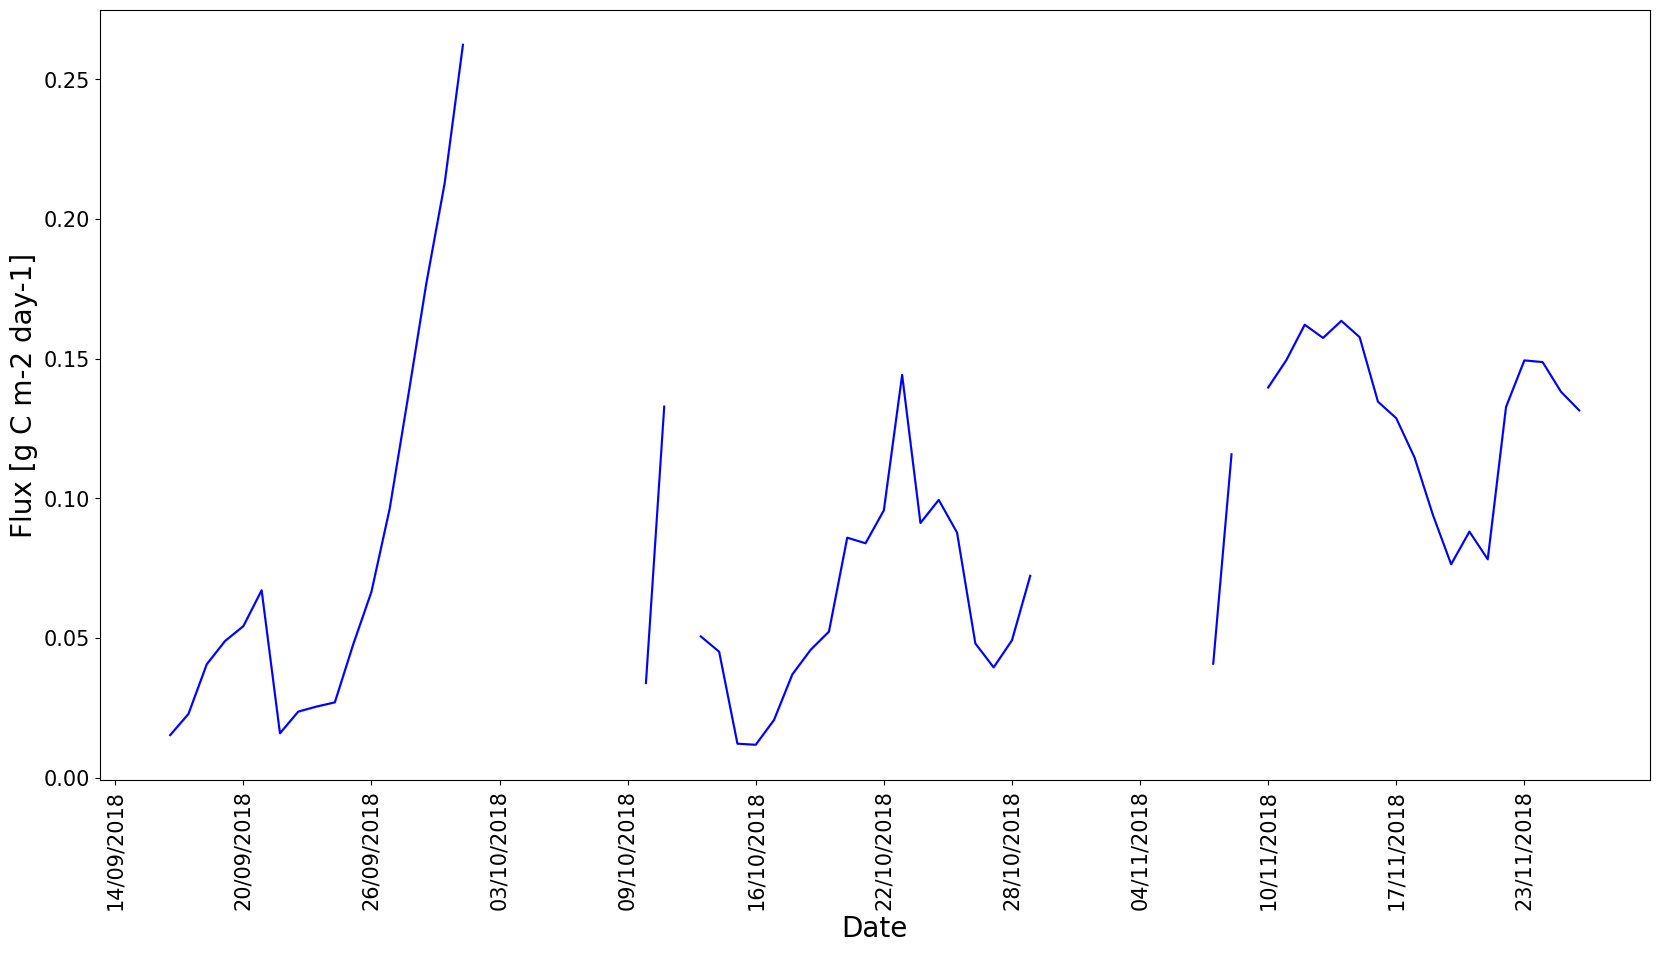

In [18]:
# Set up a figure with 1 axes
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(20, 10))

# Plot data on the ax object
sns.lineplot(data=merged_data, x='Date', y='OF [g C m-2 day-1]', hue=merged_data["OF [g C m-2 day-1]"].isna().cumsum(), palette=["blue"]*sum(merged_data["OF [g C m-2 day-1]"].isna()), legend=False, markers=True, ax=ax)

# Set plot features 
plt.xlabel(f'Days since {merged_data.loc[0,"Datetime"]}', fontdict={'size':20})
plt.ylabel('Flux [g C m-2 day-1]', fontdict={'size':20})
plt.tick_params(labelsize=15)

# Use WeekdayLocator and DateFormatter to show only weekly dates on x-axis
date_fmt = mdates.DateFormatter('%d-%m-%Y')
week_locator = mdates.WeekdayLocator(byweekday=mdates.MO)
ax.xaxis.set_major_locator(week_locator)
ax.xaxis.set_major_formatter(date_fmt)

# Set x-axis tick labels
tick_locs = ax.get_xticks() # Get the current tick locations
ax.set_xticks(tick_locs) # Set the same tick locations
ax.set_xticklabels(merged_data['Date'][::len(merged_data['Date'])//len(tick_locs)][:-1], rotation='vertical')

# Set x axis label
ax.set_xlabel('Date', fontsize=20) 

# Show figure!
plt.show()
